In [1]:
import callhorizons
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Get ephemeris

Query JPL HORIZONS for the Roadster...

In [3]:
roadster = callhorizons.query('Tesla', smallbody=False)

Set a range of epochs at 20 minute intervals

In [4]:
interval='20m'
roadster.set_epochrange('2018-02-08 15:00', '2018-02-08 19:00', interval)

Get ephemerides for observing site 413 (Siding Spring Observatory)

In [5]:
n_ephemeris = roadster.get_ephemerides(413)
n_ephemeris

13

In [6]:
roadster_positions = SkyCoord(roadster['RA'], roadster['DEC'], unit='deg')
roadster_positions.to_string(style='hmsdms')

['14h34m10.0104s -26d55m47.172s',
 '14h34m07.9776s -26d56m53.376s',
 '14h34m04.9272s -26d57m55.008s',
 '14h34m00.9408s -26d58m51.672s',
 '14h33m56.0952s -26d59m42.9s',
 '14h33m50.4792s -27d00m28.404s',
 '14h33m44.1864s -27d01m07.824s',
 '14h33m37.3104s -27d01m40.944s',
 '14h33m29.9496s -27d02m07.512s',
 '14h33m22.2048s -27d02m27.42s',
 '14h33m14.1744s -27d02m40.56s',
 '14h33m05.9616s -27d02m46.86s',
 '14h32m57.6648s -27d02m46.392s']

In [7]:
roadster_positions[-1].separation(roadster_positions[0])

<Angle 0.29276924 deg>

## Get an image

In [8]:
image_size = 30 * u.arcminute

In [9]:
image_hdu = SkyView.get_images(position=roadster_positions[n_ephemeris // 2],
                               survey='DSS2 Red',
                               coordinates='ICRS',
                               projection='Tan',
                               pixels='1000,1000',
                               height=image_size,
                               width=image_size)

In [10]:
image_wcs = WCS(image_hdu[0][0].header)
image_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.434  -27.0188  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0005  0.0005  
NAXIS : 1000  1000

Need to flip y axis

In [11]:
image_wcs.wcs.cdelt = (-0.0005, -0.0005)
image_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 218.434  -27.0188  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0005  -0.0005  
NAXIS : 1000  1000

In [14]:
image_data = np.flipud(image_hdu[0][0].data)

## Make a finding chart

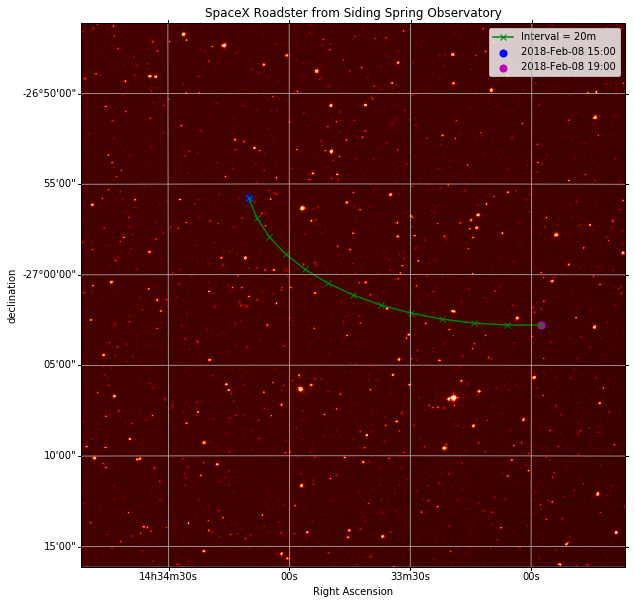

In [15]:
plt.figure(figsize=(12,10))
ax = plt.subplot(projection=image_wcs)

ax.imshow(image_data, cmap='gist_heat')

ax.scatter(roadster_positions.ra[0], roadster_positions.dec[0],
           transform=ax.get_transform('world'),
           marker='o', s=50, c='b',
           label=roadster['datetime'][0])
ax.scatter(roadster_positions.ra[-1], roadster_positions.dec[-1],
           transform=ax.get_transform('world'),
           marker='o', s=50, c='m',
           label=roadster['datetime'][-1])
ax.plot(roadster_positions.ra, roadster_positions.dec,
        'g-x', transform=ax.get_transform('world'),
        label='Interval = {}'.format(interval))

ax.coords[0].set_axislabel('Right Ascension')
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_axislabel('declination')
ax.coords[1].set_major_formatter('dd:mm:ss')
ax.grid()

ax.set_title('SpaceX Roadster from Siding Spring Observatory')
ax.legend()

plt.savefig('roadster_finder.png', dpi=100);